In [21]:
install.packages('moments')
library(dplyr, warn.conflicts = FALSE)
library(repr)
options(repr.plot.width=12, repr.plot.height=6)
library(moments)
library(ggplot2)
library(reshape2)
source('../src/load_data.r')
source('../src/multiplot.r')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [22]:
train <- read.csv('../data/train.csv', stringsAsFactors = F)
test <- read.csv("../data/test.csv", stringsAsFactors = F)

In [23]:
dim(housing_df)

[1] 1451   80

In [24]:
head(housing_df, 5)

MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,2,2008,WD,Normal,208500
20,RL,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,⋯,0,without,without,without,0,5,2007,WD,Normal,181500
60,RL,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,9,2008,WD,Normal,223500
70,RL,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,⋯,0,without,without,without,0,2,2006,WD,Abnorml,140000
60,RL,84,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,⋯,0,without,without,without,0,12,2008,WD,Normal,250000


In [25]:
str(housing_df)

'data.frame':	1451 obs. of  80 variables:
 $ MSSubClass   : Factor w/ 15 levels "20","30","40",..: 6 1 6 7 6 5 1 6 5 15 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotFrontage  : num  65 80 68 60 84 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..: 6 25 6 7 14 12 21 17 18 4 ...
 $ Condition1   : Factor w/ 9 levels "Artery","Feedr",..: 3 2 3 3 3 3 3 5 1 1 ...
 $ Condition2   : Factor w/ 8 levels "Artery","Feedr",..: 3 3 3 3 3 3 3 3 3 1 ...
 $ Bld

In [26]:
dim(housing_df)

[1] 1451   80

# Contingency Table

In [27]:
table(housing_df$ExterQual)


 Ex  Fa  Gd  TA 
 51  14 481 905 

In [28]:
ftable(ExterQual~OverallQual, data = housing_df)

            ExterQual  Ex  Fa  Gd  TA
OverallQual                          
1                       0   2   0   0
2                       0   1   0   2
3                       0   2   2  16
4                       0   5   1 110
5                       0   2  17 377
6                       2   1  72 297
7                       4   1 214  96
8                       8   0 153   6
9                      23   0  19   1
10                     14   0   3   0

The contingency table above shows two categorical features being compared to each other, External Quality and Overall Quality. External Quality is has 4 levels, Ex, Fa,GD and TA. Overall Quality has 10 levels, 1 to 10. A contingency table allows us to look at the dataset and further categorize the entries, as well as to look for association between the two features. 

# Distribution Plot of SalePrice

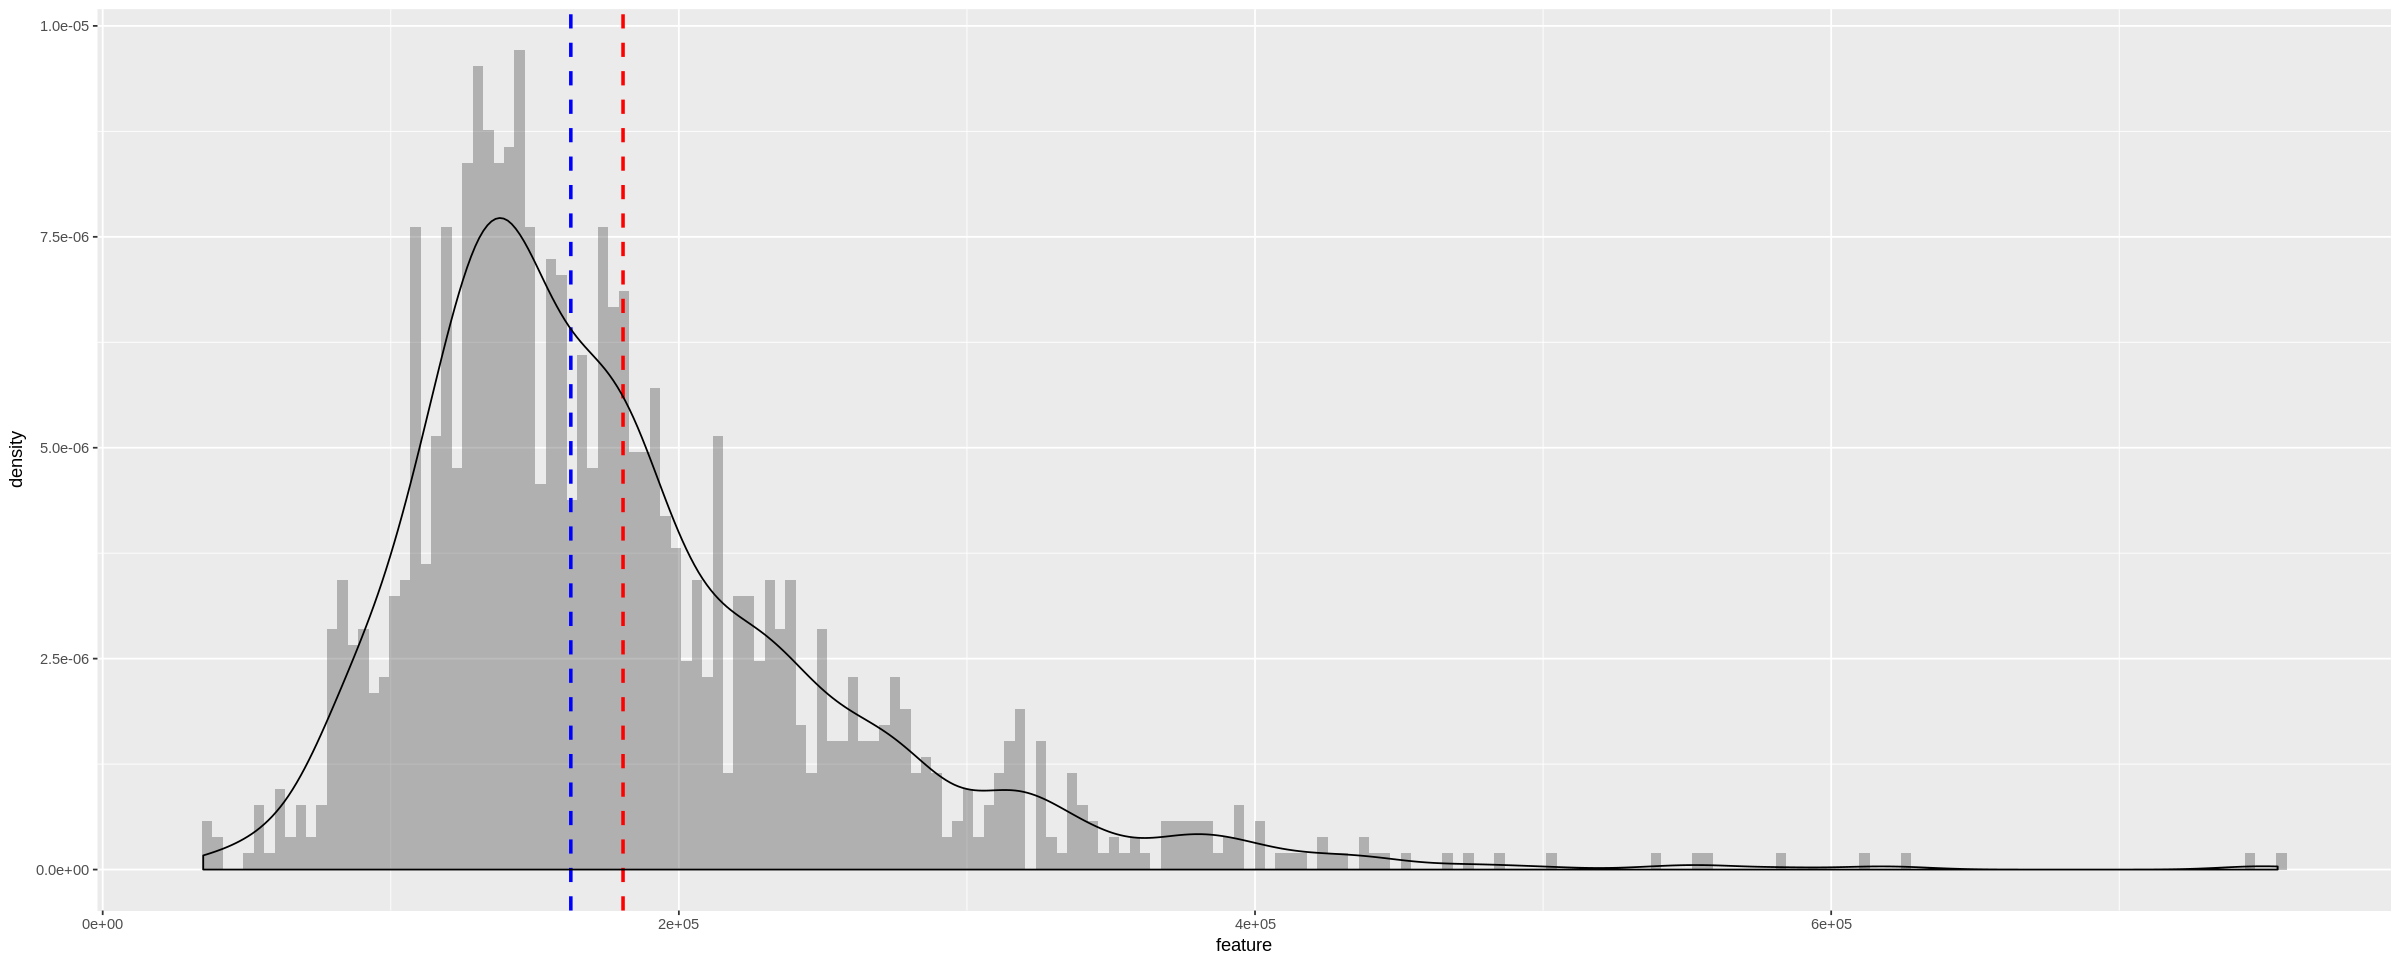

In [35]:
hist_with_kde(housing_df$SalePrice)

The distribution plot above shows a histogram with SalePrice as the x-axis and the frequency as the y-axis. The tallest point of the hill is where the mode is, which in this case means the price where the most number of houses were sold at.

# Pair Plot

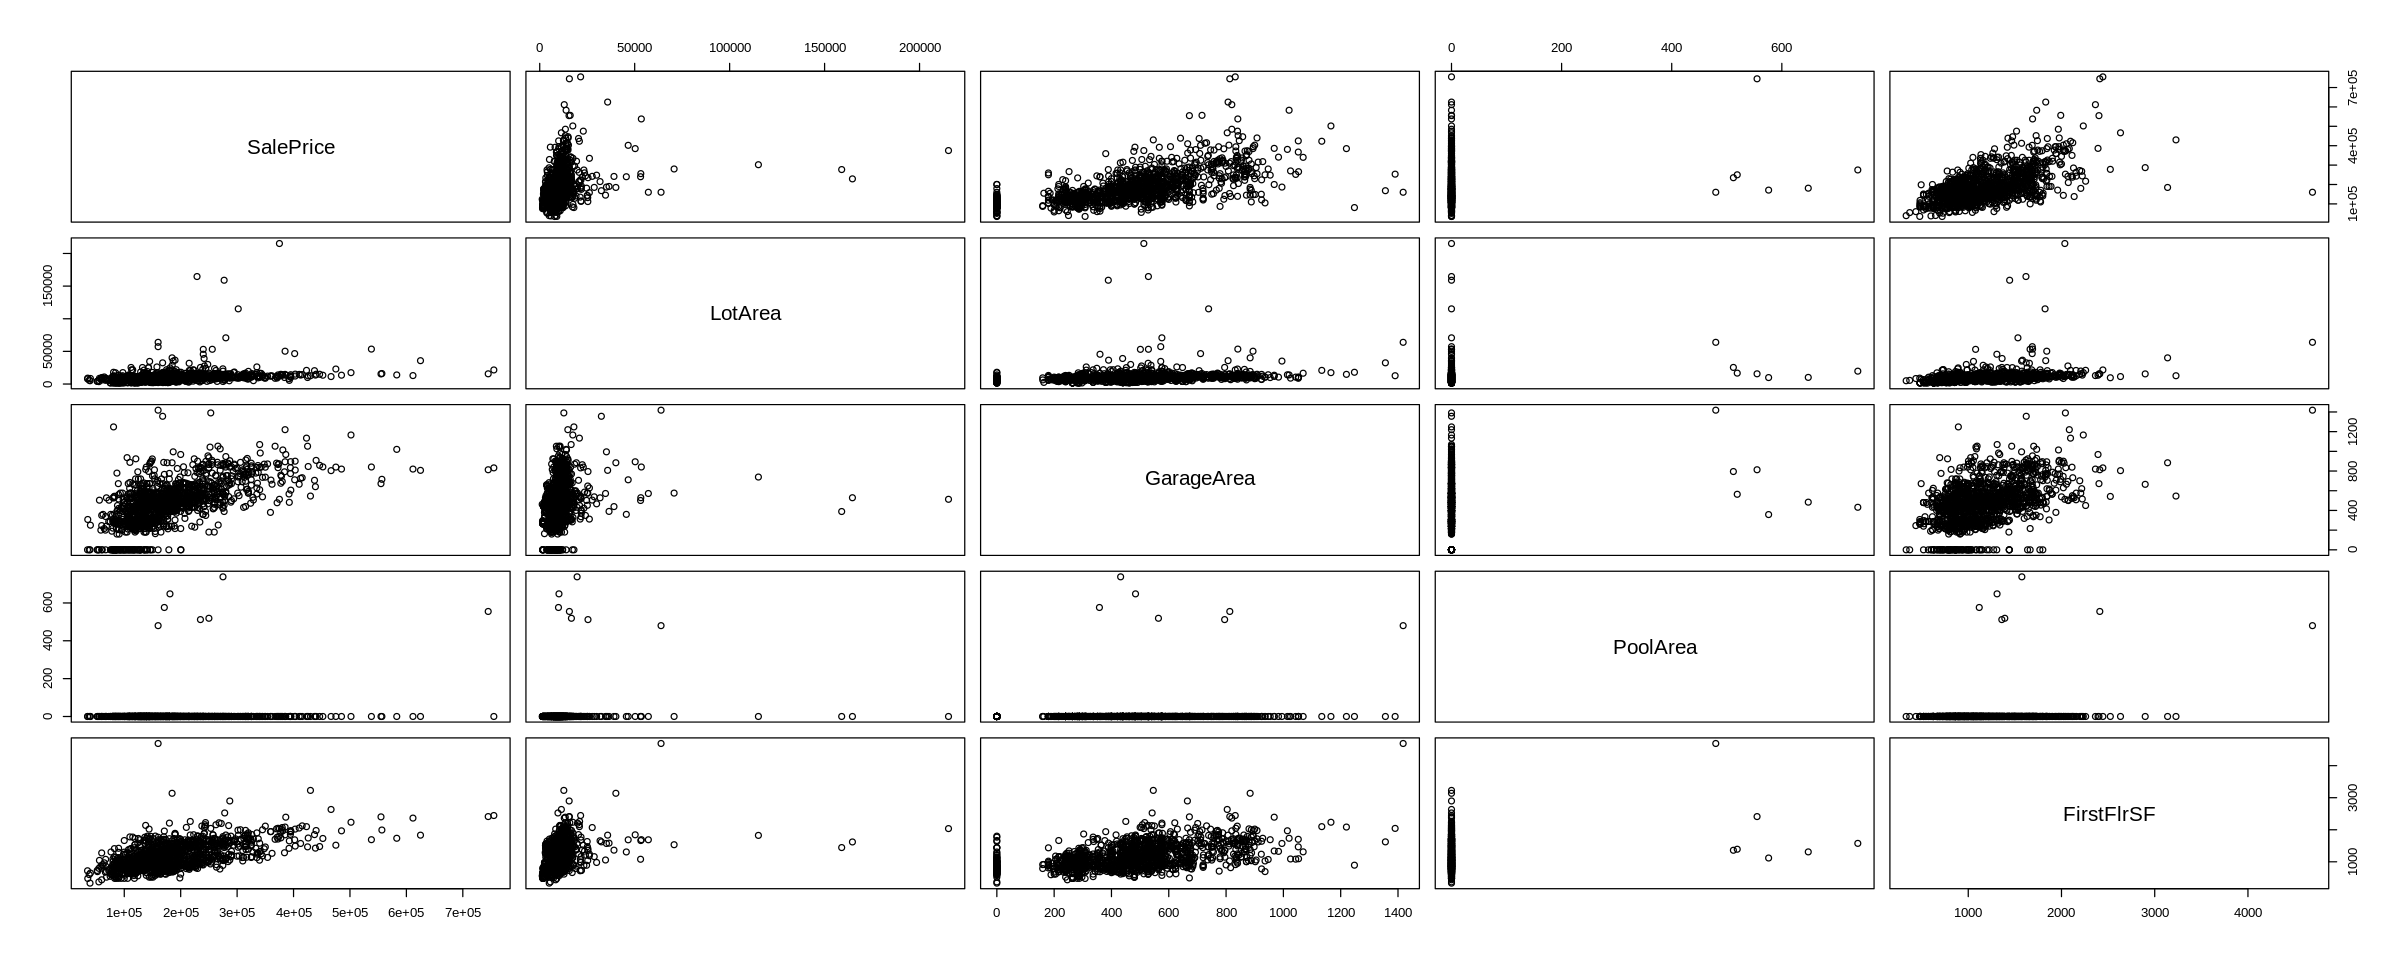

In [20]:
pairs(~SalePrice+LotArea+GarageArea+PoolArea+FirstFlrSF, data=housing_df)

A pair plot shows all the graphs where features are compared to one another in order to look for association between two features, where one will be the x-axis while the other will be the y-axis. It is mostly used to have a quick understanding of associations between features in the dataset.

# Distribution plot of SalePrice broken down by a categorical feature (External Quality)

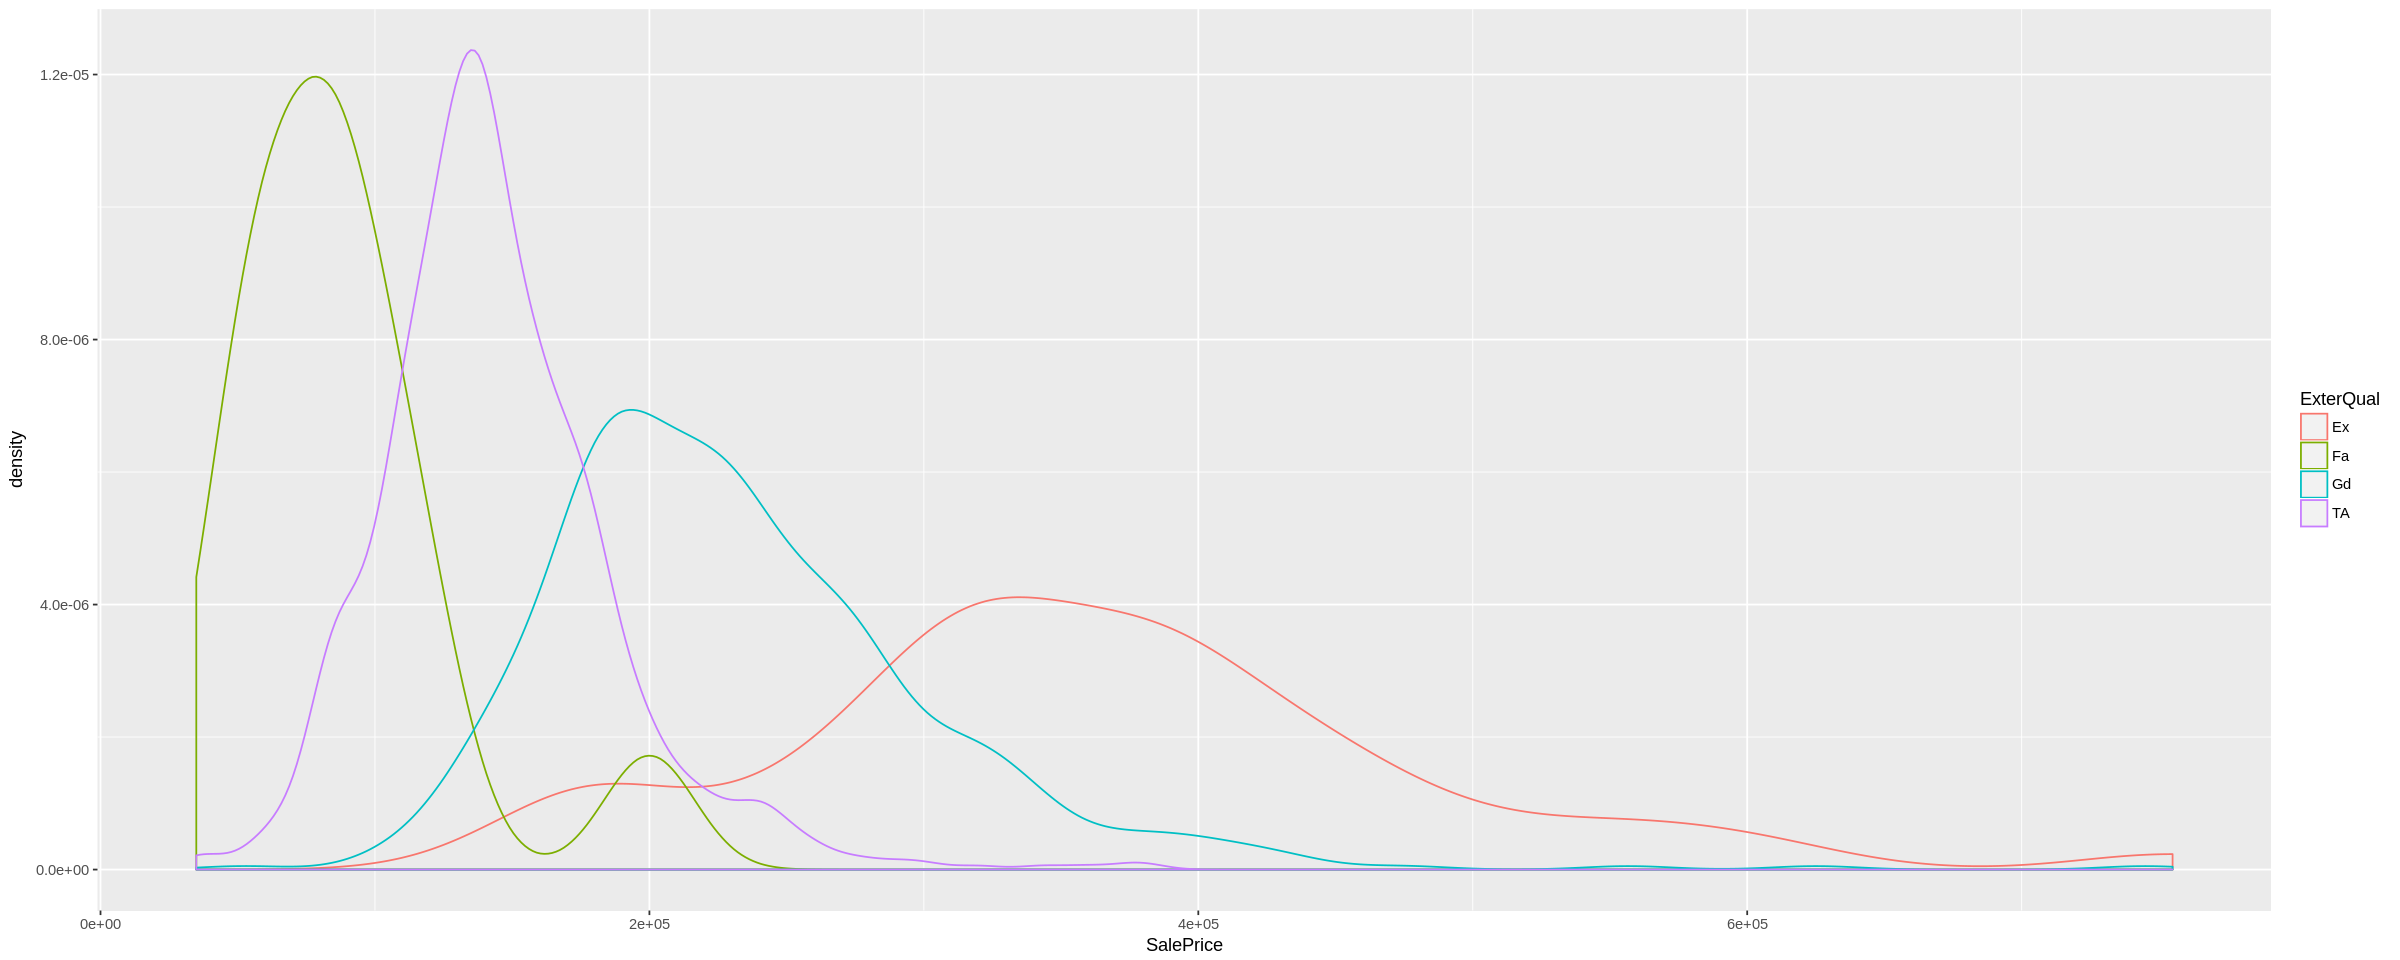

In [30]:
ggplot(housing_df, aes(x = SalePrice, color = ExterQual)) + geom_density()

The distribution plot above shows the distribution of SalePrice broken down by External Quality. As External Quality has 4 level's, we expect 4 different bell-shaped curve. This allows us to see if different levels within each feature has an effect on the target, which is SalePrice in this case. We can see that the curve for External Quality Ex, has the largest range of SalePrice, but also the group of houses that are usually sold for the highest price.